In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/fake-news/fake_or_real_news.csv
/kaggle/input/fake-news/True.csv/True.csv
/kaggle/input/fake-news/Fake.csv/Fake.csv


# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

Using TensorFlow backend.


# Loading Dataset

In [3]:
df=pd.read_csv("/kaggle/input/fake-news/fake_or_real_news.csv")

# Check for missing values

In [4]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [5]:
df.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [6]:
df.title.count()

6335

In [7]:
df['text'] = df['text'] + " " + df['title'] 
del df['title']


In [8]:
del df['Unnamed: 0']

In [9]:
df=df.rename(columns={'label': 'category'})

In [10]:
df.head()

,text,category
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


In [11]:
df['category'] = df['category'].replace({'REAL': 1, 'FAKE': 0})


# Remove noisy words from a text

In [12]:
df

,text,category
0,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,U.S. Secretary of State John F. Kerry said Mon...,1
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,It's primary day in New York and front-runners...,1
...,...,...
6330,The State Department told the Republican Natio...,1
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0
6332,Anti-Trump Protesters Are Tools of the Oligar...,0
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",1


In [13]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [14]:
stop

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

# Stemming and lemmatization

In [15]:
stemmer = PorterStemmer()
def stem_text(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            word = stemmer.stem(i.strip())
            final_text.append(word)
    return " ".join(final_text)    

In [16]:
df.text = df.text.apply(stem_text)

# Generating Word Cloud

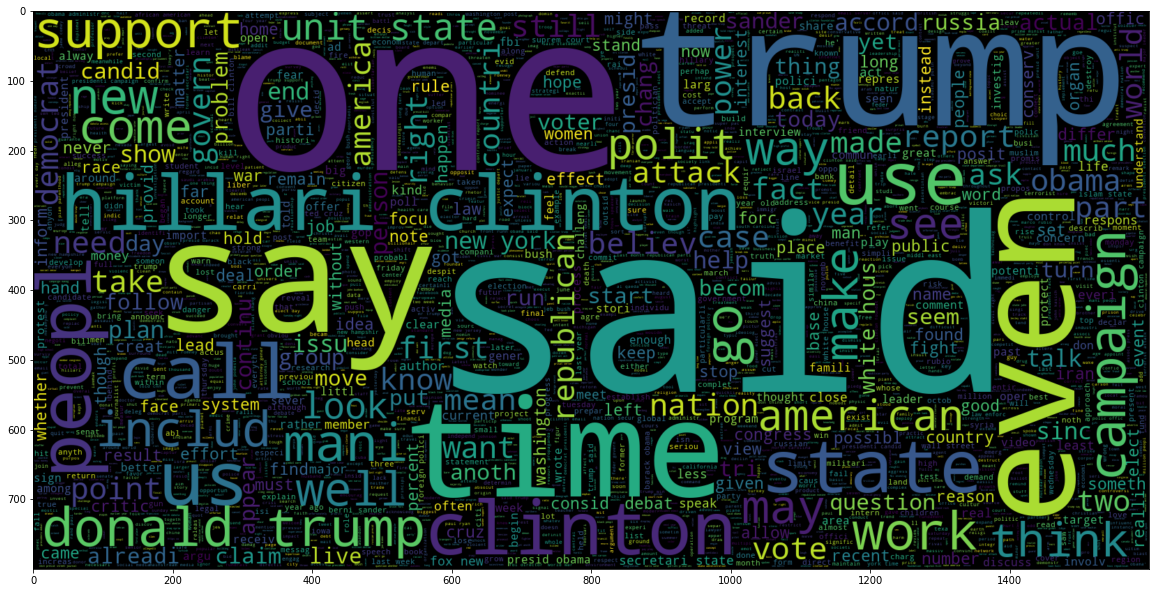

In [17]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df.text))
plt.imshow(wc , interpolation = 'bilinear')

# Spliting training and testing data

In [18]:
x_train,x_test,y_train,y_test = train_test_split(df.text,df.category)

# Text-2-Vector conversion 

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import pickle

# Load training dataset (list of texts)

training_texts = df['text']# Assuming one text per line

# Create and fit vectorizer on the full dataset
vectorizer = CountVectorizer(max_features=1000)
vectorizer.fit(training_texts)

# Save the fitted vectorizer for reuse
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

cv=vectorizer

In [20]:
#transformed train reviews
cv_train_reviews=cv.fit_transform(x_train)
#transformed test reviews
cv_test_reviews=cv.transform(x_test)

# Define the model

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, precision_recall_curve
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import backend as K

# Custom metrics functions
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))

# Model definition with regularization
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=cv_train_reviews.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model

In [22]:
# Compile with custom metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision, recall, f1])



# Fit the model

In [23]:
# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Convert sparse matrices to dense arrays
X_train_dense = cv_train_reviews.toarray()
X_test_dense = cv_test_reviews.toarray()

# Train model with validation
history = model.fit(X_train_dense, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=1)

Train on 3800 samples, validate on 951 samples
Epoch 1/20
3800/3800 [==============================] - 2s 422us/step - loss: 0.5088 - accuracy: 0.7537 - precision: 0.7623 - recall: 0.7846 - f1: 0.7588 - val_loss: 0.3008 - val_accuracy: 0.8875 - val_precision: 0.9005 - val_recall: 0.8768 - val_f1: 0.8849
Epoch 2/20
3800/3800 [==============================] - 0s 127us/step - loss: 0.2943 - accuracy: 0.8837 - precision: 0.9078 - recall: 0.8577 - f1: 0.8772 - val_loss: 0.2709 - val_accuracy: 0.8991 - val_precision: 0.9191 - val_recall: 0.8820 - val_f1: 0.8971
Epoch 3/20
3800/3800 [==============================] - 0s 127us/step - loss: 0.1887 - accuracy: 0.9318 - precision: 0.9413 - recall: 0.9206 - f1: 0.9286 - val_loss: 0.2690 - val_accuracy: 0.9138 - val_precision: 0.9199 - val_recall: 0.9126 - val_f1: 0.9141
Epoch 4/20
3800/3800 [==============================] - 0s 128us/step - loss: 0.1218 - accuracy: 0.9589 - precision: 0.9618 - recall: 0.9553 - f1: 0.9569 - val_loss: 0.2862 - val_

In [24]:
# Extract weights from the model
weights = model.get_weights()

# Save weights to a NumPy binary file.
# Kaggle notebooks typically look in the working directory for output files.
np.save('model_weights.npy', weights)

print("Weights saved to model_weights.npy")


Weights saved to model_weights.npy


# Evaluation

In [25]:
from sklearn.metrics import classification_report
from tabulate import tabulate  # Install with: pip install tabulate

# Generate predictions and classification report
y_pred_prob = model.predict(cv_test_reviews.toarray())
y_pred = (y_pred_prob > 0.5).astype(int)
report = classification_report(y_test, y_pred, output_dict=True)

# Create formatted table
headers = ["Class", "Precision", "Recall", "F1-Score", "Support"]
table = []
for key in ['0', '1']:
    table.append([
        key,
        f"{report[key]['precision']:.2f}",
        f"{report[key]['recall']:.2f}",
        f"{report[key]['f1-score']:.2f}",
        report[key]['support']
    ])

# Add averages
for avg in ['accuracy', 'macro avg', 'weighted avg']:
    table.append([
        avg.title(),
        f"{report[avg]['precision']:.2f}" if avg != 'accuracy' else "",
        f"{report[avg]['recall']:.2f}" if avg != 'accuracy' else "",
        f"{report[avg]['f1-score']:.2f}" if avg != 'accuracy' else f"{report[avg]:.2f}",
        report[avg]['support'] if avg != 'accuracy' else ""
    ])

# Print formatted report
print("\n\033[1mCLASSIFICATION REPORT\033[0m")
print(tabulate(table, headers=headers, tablefmt="grid", stralign="center", numalign="center"))


CLASSIFICATION REPORT
+--------------+-------------+----------+------------+-----------+
|    Class     |  Precision  |  Recall  |  F1-Score  |  Support  |
+==============+=============+==========+============+===========+
|      0       |    0.90     |   0.90   |    0.9     |    770    |
+--------------+-------------+----------+------------+-----------+
|      1       |    0.90     |   0.91   |    0.9     |    814    |
+--------------+-------------+----------+------------+-----------+
|   Accuracy   |             |          |    0.9     |           |
+--------------+-------------+----------+------------+-----------+
|  Macro Avg   |    0.90     |   0.90   |    0.9     |   1584    |
+--------------+-------------+----------+------------+-----------+
| Weighted Avg |    0.90     |   0.90   |    0.9     |   1584    |
+--------------+-------------+----------+------------+-----------+


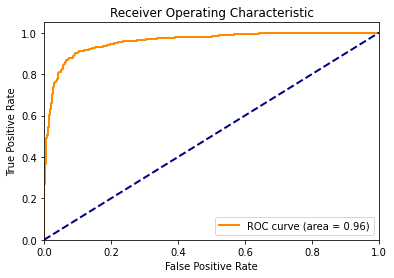

In [26]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

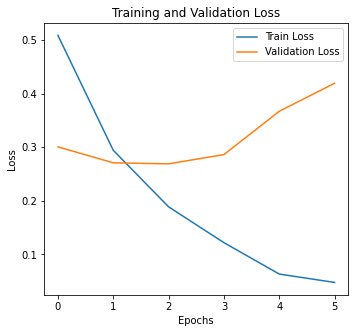

In [27]:
# Training/Validation Curves
plt.figure(figsize=(12, 5))

# Loss curves
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


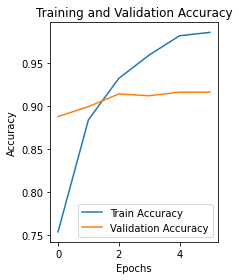

In [28]:
# Accuracy curves
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

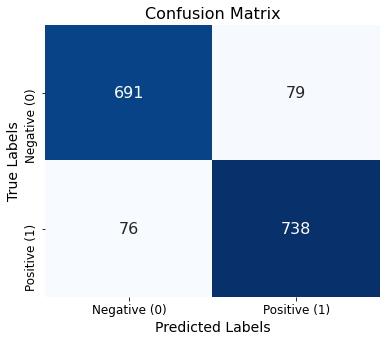

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create pretty confusion matrix plot
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                 cbar=False, annot_kws={'size': 16})

# Add labels and titles
ax.set_xlabel('Predicted Labels', fontsize=14)
ax.set_ylabel('True Labels', fontsize=14)
ax.set_title('Confusion Matrix', fontsize=16)
ax.xaxis.set_ticklabels(['Negative (0)', 'Positive (1)'], fontsize=12)
ax.yaxis.set_ticklabels(['Negative (0)', 'Positive (1)'], fontsize=12)

plt.show()